<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [68]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.8.1


In [69]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

from matplotlib import style
style.use('dark_background')

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data preparation

In [70]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [71]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [72]:
df.Time = pd.to_datetime(df.Time)

In [73]:
plotly_df(df.set_index('Time')[["Users"]])

In [74]:
from fbprophet import Prophet

In [75]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [76]:
train_df = df[:-predictions].copy()

In [77]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [78]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [79]:
future.shape

(2616, 1)

In [80]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35297.964553,37187.684753,48300.143488,35258.079249,35344.483432,7425.388324,7425.388324,7425.388324,8790.599740,8790.599740,8790.599740,-1365.211416,-1365.211416,-1365.211416,0.0,0.0,0.0,42723.352876
2612,2017-04-20 06:00:00,35306.496023,40257.196198,50910.061070,35257.797179,35365.310611,10117.537366,10117.537366,10117.537366,11420.443358,11420.443358,11420.443358,-1302.905993,-1302.905993,-1302.905993,0.0,0.0,0.0,45424.033389
2613,2017-04-20 07:00:00,35315.027494,41639.794606,53261.523466,35263.319707,35396.643248,11966.782395,11966.782395,11966.782395,13204.959728,13204.959728,13204.959728,-1238.177333,-1238.177333,-1238.177333,0.0,0.0,0.0,47281.809889
2614,2017-04-20 08:00:00,35323.558965,43826.007132,54550.415797,35267.208047,35420.319335,13567.805008,13567.805008,13567.805008,14739.046848,14739.046848,14739.046848,-1171.241840,-1171.241840,-1171.241840,0.0,0.0,0.0,48891.363973
2615,2017-04-20 09:00:00,35332.090436,44240.500631,55482.497475,35268.056702,35435.914072,14852.175445,14852.175445,14852.175445,15954.485005,15954.485005,15954.485005,-1102.309561,-1102.309561,-1102.309561,0.0,0.0,0.0,50184.265881


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here: 


In [34]:
round(forecast[forecast['ds']=='2017-01-17 00:00:00']['yhat'])

384    31475.0
Name: yhat, dtype: float64

Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: MAPE 12.739078711287004

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: MAE 4369.217759274862


In [35]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [36]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [37]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-04-20 07:00:00,47281.809889,41818.797567,53208.940320,38418
2017-04-20 08:00:00,48891.363973,43410.306043,54684.491174,40238
2017-04-20 09:00:00,50184.265881,44681.265622,55741.993453,40763


In [38]:
for err_name, err_value in calculate_forecast_errors(cmp_df, predictions).items():
    print(err_name, err_value)

MAPE 12.739078711287004
MAE 4369.217759274862


## Predicting with ARIMA

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: No
- What is p_value? Answer: p = 0.25574

In [44]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

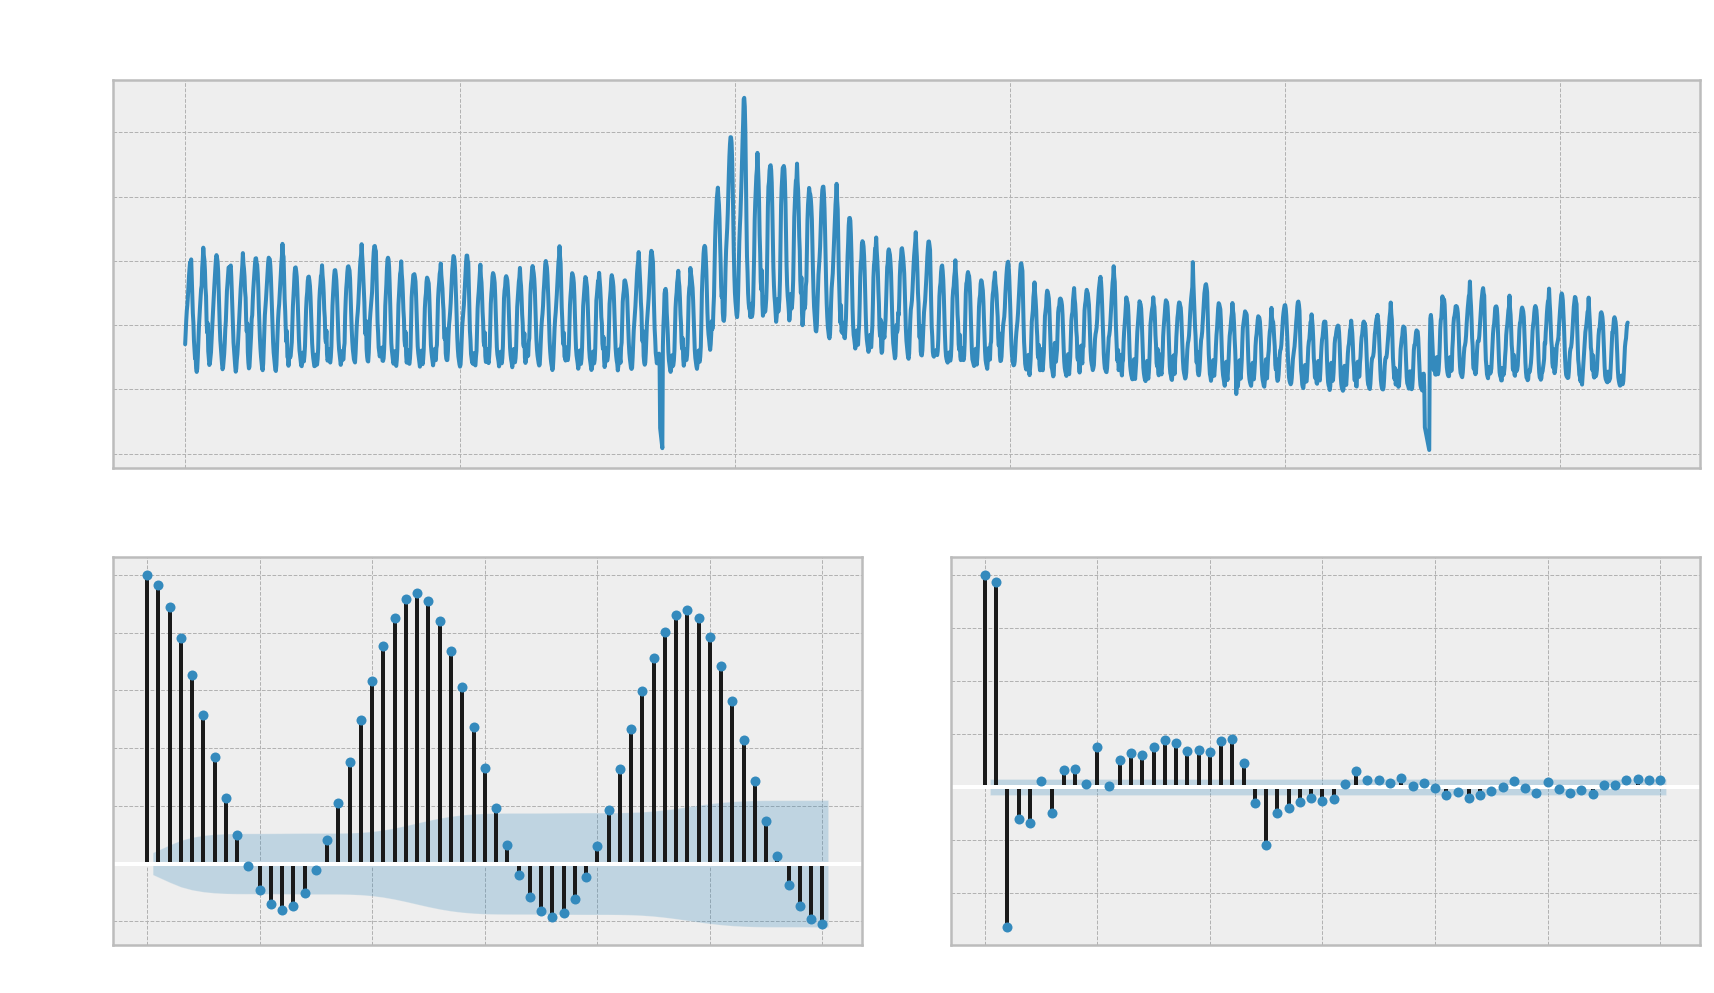

In [45]:
tsplot(df.y, lags=60)

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2
<br/>
<br/>

- ANSWER: p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1

In [51]:
parameters_list = [(3,0,2,2,1,1),(3,1,6,2,1,1),(5,1,6,1,0,1),(7,0,7,2,2,2)]
s=24

In [82]:
def optimizeSARIMA(y,parameters_list, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(y, order=(param[0], param[1], param[2]), 
                                            seasonal_order=(param[3], param[4], param[5], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [54]:
%%time
result_table = optimizeSARIMA(df.y, parameters_list, s)
result_table.head()


CPU times: user 1h 1min 40s, sys: 26.4 s, total: 1h 2min 6s
Wall time: 15min 32s


,parameters,aic
0,"(3, 1, 6, 2, 1, 1)",47247.486465
1,"(3, 0, 2, 2, 1, 1)",47332.101726
2,"(5, 1, 6, 1, 0, 1)",47742.636576
3,"(7, 0, 7, 2, 2, 2)",48216.117202


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here: 0.246704

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Now do the same, but for the series with Box-Cox transformation.

In [83]:
import scipy.stats
train_df['y'], lmbda = scipy.stats.boxcox(train_df['y']) 

print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [81]:
train_df.head()

,ds,y
0,2017-01-01 00:00:00,34002
1,2017-01-01 01:00:00,37947
2,2017-01-01 02:00:00,41517
3,2017-01-01 03:00:00,44476
4,2017-01-01 04:00:00,46234


In [ ]:
%%time
result_table = optimizeSARIMA(train_df['y'],parameters_list, s)
result_table.head()

 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [ ]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [ ]:
m2 = Prophet()
m2.fit(train_df)
future2 = m2.make_future_dataframe(periods=prediction_size)
forecast2 = m2.predict(future2)

In [ ]:
for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

In [ ]:
cmp_df2 = make_comparison_dataframe(df, forecast2)
for err_name, err_value in calculate_forecast_errors(cmp_df2, prediction_size).items():
    print(err_name, err_value)

In [ ]:
show_forecast(cmp_df, prediction_size, 100, 'No transformations')
show_forecast(cmp_df2, prediction_size, 100, 'Box–Cox transformation')